In [23]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, kendalltau

<h1>Read dependent variables data</h1>

In [24]:

#read dependent variables data
def read_dataset(nUsers):
    dataset = pd.read_csv('./data/dataset_{}.tsv'.format(nUsers), sep= '\t', lineterminator='\n')
    #dataset[['subreddit', 'percentage', 'avg_retention', 'growth_1year_posts', 'growth_1year_comments', 'avg_posts', 'avg_comments']].to_csv('./logistic_results/L2/{}_users/dataset_{}.tsv'.format(nUsers, nUsers), index = False, sep = '\t')
    return dataset

dataset_10 = read_dataset(10)
dataset_20 = read_dataset(20)
dataset_30 = read_dataset(30)
dataset_40 = read_dataset(40)
dataset_50 = read_dataset(50)
dataset_60 = read_dataset(60)
dataset_70 = read_dataset(70)
dataset_80 = read_dataset(80)
dataset_90 = read_dataset(90)
dataset_100 = read_dataset(100)

#compute Spearman's correlation
def get_correlations(dataset):
    cors = {}
    cors[1], pvalue = spearmanr(dataset.percentage, dataset.avg_retention)
    cors[2], pvalue = spearmanr(dataset.percentage, dataset.growth_1year_comments)
    cors[3], pvalue = spearmanr(dataset.percentage, dataset.growth_1year_posts)
    cors[4], pvalue = spearmanr(dataset.percentage, dataset.avg_posts)
    cors[5], pvalue = spearmanr(dataset.percentage, dataset.avg_comments)
    cors[6], pvalue = spearmanr(dataset.avg_retention, dataset.growth_1year_comments)
    cors[7], pvalue = spearmanr(dataset.avg_retention, dataset.growth_1year_posts)
    cors[8], pvalue = spearmanr(dataset.avg_retention, dataset.avg_posts)
    cors[9], pvalue = spearmanr(dataset.avg_retention, dataset.avg_comments)
    cors[10], pvalue = spearmanr(dataset.growth_1year_comments, dataset.avg_posts)
    cors[11], pvalue = spearmanr(dataset.growth_1year_comments, dataset.avg_comments)
    cors[12], pvalue = spearmanr(dataset.growth_1year_comments, dataset.growth_1year_posts)
    cors[13], pvalue = spearmanr(dataset.growth_1year_posts, dataset.avg_posts)
    cors[14], pvalue = spearmanr(dataset.growth_1year_posts, dataset.avg_comments)
    cors[15], pvalue = spearmanr(dataset.avg_posts, dataset.avg_comments)
    df = pd.DataFrame(list(cors.items()), columns=['Variables', 'Correlation'])
    return df

# compute Kendall's Tau correlation
def get_correlations_kendall_Tau(dataset):
    cors = {}
    #survival x avg retention
    cors[1], pvalue = kendalltau(dataset.percentage, dataset.avg_retention)
    #survival x growth commenters
    cors[2], pvalue = kendalltau(dataset.percentage, dataset.growth_1year_comments)
    #survival x growth posters
    cors[3], pvalue = kendalltau(dataset.percentage, dataset.growth_1year_posts)
    #survival x avg posts
    cors[4], pvalue = kendalltau(dataset.percentage, dataset.avg_posts)
    #survival x avg comments
    cors[5], pvalue = kendalltau(dataset.percentage, dataset.avg_comments)
    #retention x growth commenters
    cors[6], pvalue = kendalltau(dataset.avg_retention, dataset.growth_1year_comments)
    #retention x growth posters
    cors[7], pvalue = kendalltau(dataset.avg_retention, dataset.growth_1year_posts)
    #retention x avg posts
    cors[8], pvalue = kendalltau(dataset.avg_retention, dataset.avg_posts)
    #retention x avg comments
    cors[9], pvalue = kendalltau(dataset.avg_retention, dataset.avg_comments)
    #growth commenters x avg posts
    cors[10], pvalue = kendalltau(dataset.growth_1year_comments, dataset.avg_posts)
    #growth commenters x avg commenters
    cors[11], pvalue = kendalltau(dataset.growth_1year_comments, dataset.avg_comments)
    #growth commenters x growth posters
    cors[12], pvalue = kendalltau(dataset.growth_1year_comments, dataset.growth_1year_posts)
    #growth posters x avg posts
    cors[13], pvalue = kendalltau(dataset.growth_1year_posts, dataset.avg_posts)
    #growth posters x avg comments
    cors[14], pvalue = kendalltau(dataset.growth_1year_posts, dataset.avg_comments)
    #avg posts x avg comments
    cors[15], pvalue = kendalltau(dataset.avg_posts, dataset.avg_comments)
    df = pd.DataFrame(list(cors.items()), columns=['Variables', 'Correlation'])
    return df


#Compute correlations
dfs = []
dfs.append(get_correlations(dataset_10))
dfs.append(get_correlations(dataset_20))
dfs.append(get_correlations(dataset_30))
dfs.append(get_correlations(dataset_40))
dfs.append(get_correlations(dataset_50))
dfs.append(get_correlations(dataset_60))
dfs.append(get_correlations(dataset_70))
dfs.append(get_correlations(dataset_80))
dfs.append(get_correlations(dataset_90))
dfs.append(get_correlations(dataset_100))

dfs = pd.concat(dfs)

dfs

,Variables,Correlation
0,1,0.432646
1,2,0.417429
2,3,0.505791
3,4,0.452785
4,5,0.361958
5,6,0.560902
6,7,0.522965
7,8,0.761184
8,9,0.654703
9,10,0.732177


<h1>Plot heatmap figure</h1>

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text yticklabel objects>)

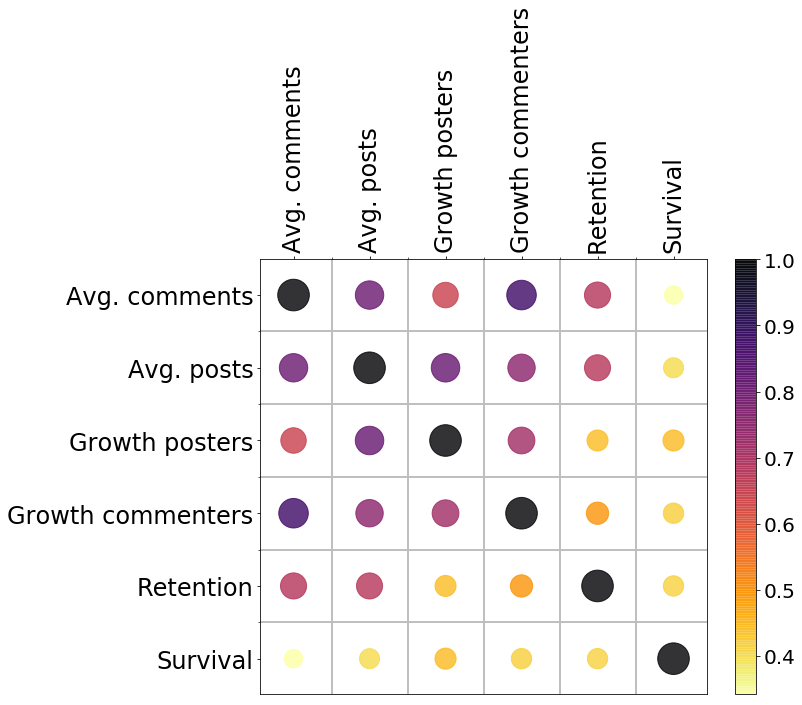

In [ ]:
names = ['survival x avg retention', 'survival x growth commenters', 'survival x growth posters', 'survival x avg posts',
'survival x avg comments', 'retention x growth commenters', 'retention x growth posters', 'retention x avg posts',
'retention x avg comments', 'growth commenters x avg posts', 'growth commenters x avg commenters', 
'growth commenters x growth posters', 'growth posters x avg posts', 'growth posters x avg comments',
'avg posts x avg comments']

grouped_dfs = dfs.groupby('Variables').agg({'Correlation':'mean'}).reset_index()
grouped_dfs['Variables'] = names

# print(grouped_dfs)

correlations = grouped_dfs['Correlation'].tolist()
correlations
# survival x avg retention cors[1]
# survival x growth commenters cors[2]
# survival x growth posters cors[3]
# survival x avg posts cors[4]
# survival x avg comments cors[5]
# retention x growth commenters cors[6]
# retention x growth posters cors[7]
# retention x avg posts cors[8]
# retention x avg comments cors[9]
# growth commenters x avg posts cors[10]
# growth commenters x avg commenters cors[11]
# growth commenters x growth posters cors[12]
# growth posters x avg posts cors[13]
# growth posters x avg comments cors[14]
# avg posts x avg comments cors[15]


#get the correlation values
table = []

            #survival, avg retention, growth commenters, growth posters, avg posts, avg comments
#Survival
table.append([1, correlations[0], correlations[1], correlations[2], correlations[3], correlations[4]])
#avg retention
table.append([correlations[0], 1, correlations[5], correlations[6], correlations[7], correlations[8]])
#growth commenters
table.append([correlations[1], correlations[5], 1, correlations[11], correlations[9], correlations[10]])
#growth posters
table.append([correlations[2], correlations[6], correlations[11], 1, correlations[12], correlations[13]])
#avg posts
table.append([correlations[3], correlations[7], correlations[9],correlations[12], 1, correlations[14]])
#avg comments
table.append([correlations[4], correlations[8], correlations[10],correlations[13], correlations[14], 1])

df = pd.DataFrame(table)
df.columns = ['Survival', 'Retention', 'Growth commenters', 'Growth posters', 'Avg. posts', 'Avg. comments']
df.index = ['Survival', 'Retention', 'Growth commenters', 'Growth posters', 'Avg. posts', 'Avg. comments']
# df
fig, ax = plt.subplots(figsize=(10,8))

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 6, 1));
ax.set_yticks(np.arange(0, 6, 1));


ax.set_yticklabels(['Survival', 'Retention', 'Growth commenters', 'Growth posters', 'Avg. posts', 'Avg. comments'])
ax.set_xticklabels(['Avg. comments', 'Avg. posts', 'Growth posters', 'Growth commenters', 'Retention', 'Survival'], rotation='vertical')

# Minor ticks
ax.set_xticks(np.arange(-.5, 6, 1), minor=True);
ax.set_yticks(np.arange(-.5, 6, 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='0.75', linestyle='-', linewidth=2)

#get the coordinates of the grid's cells
x = []
y = []
for i in range(0,6):
    for j in range(0,6):
        x.append(j)
        y.append(i)
        
# Get the flat list of correlation values
flat_list = [item for sublist in table for item in sublist[::-1]]
size = [(a / max(flat_list))*1000 for a in flat_list]  # scale

#plot the circles at the grid
sc = ax.scatter(x,y,s=size, c=flat_list,  alpha=0.8, cmap = 'inferno_r')
ax.xaxis.tick_top()

#Add color bar
cbar = fig.colorbar(sc)
cbar.ax.set_yticklabels(labels = ['0.4','0.5','0.6','0.7','0.8','0.9', '1.0'], fontsize=20)  # vertically oriented colorbar

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# plt.savefig('./dependent_variables_correlations_heatmap.pdf', bbox_inches='tight', dpi=1200)


<h1>Plot boxplot figure</h1>

In [ ]:
order=dfs.groupby('Variables')['Correlation'].median().sort_values().index.values

print(order)

fig, ax = plt.subplots(figsize=(10,8))

ax = sns.boxplot(x="Correlation", y="Variables", data=dfs, orient='h', order=order)
ax = sns.stripplot(x="Correlation", y="Variables", data=dfs,jitter=True, color=".3", order=order, orient='h')

ax.set_yticklabels(['Survival x Avg. comments', 'Survival x Avg. post', 'Survival x Retention', 'Survival x G. commenters', 'Retention x G. posters', 'Survival x G. posters', 'Retention x G. commenters',  'G. posters x Avg. comments', 'Retention x Avg. posts', 'Retention x Avg. comments', 'G. commenters x G. posters', 'G. commenters x Avg. post', 'Avg. post x Avg. comments', 'G. posters x Avg. post', 'G. comm. x Avg. comments'])

plt.xlabel('Spearman\'s correlation', fontsize=26, fontweight='bold')
plt.ylabel('Pairs of success measures', fontsize=26, fontweight='bold')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# plt.savefig('./dependent_variables_correlations.pdf', bbox_inches='tight', dpi=1200)

<h1>Plot correlations as number of users grows</h1>

In [ ]:
def get_users(dfs, value):
    col = [10,20,30,40,50,60,70,80,90,100]
    x = dfs[dfs.Variables==value].copy()
    x['users'] = col
    return x

x = get_users(dfs, 2)

pairs = ['Survival x Avg. comments', 'Survival x Avg. post', 'Survival x Retention', 'Survival x G. commenters', 'Retention x G. posters', 'Survival x G. posters', 'Retention x G. commenters',  'G. posters x Avg. comments', 'Retention x Avg. posts', 'Retention x Avg. comments', 'G. commenters x G. posters', 'G. commenters x Avg. post', 'Avg. post x Avg. comments', 'G. posters x Avg. post', 'G. comm. x Avg. comments']

# x.plot(x='users', y='Correlation')
grouped_dfs = dfs.groupby('Variables').agg({'Correlation':lambda x: list(x)}).reset_index()
# grouped_dfs = dfs.groupby('Variables').agg({'Correlation':lambda x: list(x)})
grouped_dfs['pair'] = pairs
# grouped_dfs['size'] = len(grouped_dfs['Variables'])
# grouped_dfs['size'] = len(grouped_dfs['Correlation'])
# grouped_dfs
for row in grouped_dfs.itertuples():
    fig, ax = plt.subplots(figsize=(10,8))
    plt.plot([10,20,30,40,50,60,70,80,90,100], row.Correlation)

    plt.xlabel('Number of users', fontsize=24, fontweight='bold')
    plt.ylabel('Spearman\'s correlation', fontsize=24, fontweight='bold')
    plt.title(row.pair, fontsize=24, fontweight='bold')
    